## Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import umap.umap_ as umap
import matplotlib.pyplot as plt

from keras.models import Model
from sklearn import preprocessing 
from keras.layers import Dense, Input
from sklearn.decomposition import PCA
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, classification_report

## Dataset

In [2]:
test_df = pd.read_csv('dataset/student_addiction_dataset_test.csv')
train_df = pd.read_csv('dataset/student_addiction_dataset_train.csv')

In [3]:
test_df.shape, train_df.shape

((12744, 11), (50342, 11))

## Transformar valores

In [4]:
test_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No
1,No,No,Yes,No,No,Yes,No,Yes,No,No,No
2,No,No,No,Yes,No,Yes,No,No,Yes,No,No
3,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes
4,No,No,No,No,Yes,No,No,No,No,Yes,No


In [5]:
train_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,No,No,Yes,No,No,No,Yes,No,No,No
1,No,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
2,No,No,No,No,No,Yes,Yes,Yes,No,No,No
3,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes
4,Yes,Yes,No,NaN,No,Yes,Yes,Yes,No,No,Yes


In [6]:
pd.set_option('future.no_silent_downcasting', True)

In [7]:
train_df = train_df.replace({'Yes': 1, 'No': 0})
test_df = test_df.replace({'Yes': 1, 'No': 0})

In [8]:
train_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1,0,0,1,0,0,0,1,0,0,0
1,0,1,NaN,1,1,1,1,1,1,0,1
2,0,0,0,0,0,1,1,1,0,0,0
3,1,0,1,1,0,1,0,0,0,1,1
4,1,1,0,NaN,0,1,1,1,0,0,1


In [9]:
test_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1,1,1,0,1,0,0,0,1,0,0
1,0,0,1,0,0,1,0,1,0,0,0
2,0,0,0,1,0,1,0,0,1,0,0
3,1,0,1,0,1,1,0,1,0,1,1
4,0,0,0,0,1,0,0,0,0,1,0


# Eliminar y transformar nulos

In [12]:
def reemplazar_nulos(df):
    # Reemplazar NaN con -1 en todo el DataFrame
    df.fillna(-1, inplace=True)
    return df

In [13]:
tiene_nulls = test_df.isnull().sum()
tiene_nulls

Experimentation                       645
Academic_Performance_Decline          685
Social_Isolation                      677
Financial_Issues                      620
Physical_Mental_Health_Problems       665
Legal_Consequences                    686
Relationship_Strain                   632
Risk_Taking_Behavior                  613
Withdrawal_Symptoms                   653
Denial_and_Resistance_to_Treatment    654
Addiction_Class                         0
dtype: int64

In [14]:
tiene_nulls = test_df.isnull().sum(axis=1)
conteo_nulls = tiene_nulls.value_counts().sort_index()
conteo_nulls

0    7516
1    4096
2     983
3     130
4      17
5       2
Name: count, dtype: int64

In [15]:
test_for_MLP = test_df.copy()

test_for_MLP = reemplazar_nulos(test_for_MLP)

In [16]:
train_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1,0,0,1,0,0,0,1,0,0,0
1,0,1,NaN,1,1,1,1,1,1,0,1
2,0,0,0,0,0,1,1,1,0,0,0
3,1,0,1,1,0,1,0,0,0,1,1
4,1,1,0,NaN,0,1,1,1,0,0,1


In [17]:
tiene_nulls = train_df.isnull().sum()
tiene_nulls

Experimentation                       2562
Academic_Performance_Decline          2498
Social_Isolation                      2550
Financial_Issues                      2537
Physical_Mental_Health_Problems       2454
Legal_Consequences                    2576
Relationship_Strain                   2543
Risk_Taking_Behavior                  2577
Withdrawal_Symptoms                   2612
Denial_and_Resistance_to_Treatment    2453
Addiction_Class                          0
dtype: int64

In [18]:
tiene_nulls = train_df.isnull().sum(axis=1)
conteo_nulls = tiene_nulls.value_counts().sort_index()
conteo_nulls

0    30072
1    15809
2     3870
3      553
4       36
5        2
Name: count, dtype: int64

In [19]:
train_for_MLP = train_df.copy()

train_for_MLP = reemplazar_nulos(train_for_MLP)

In [20]:
train_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1,0,0,1,0,0,0,1,0,0,0
1,0,1,NaN,1,1,1,1,1,1,0,1
2,0,0,0,0,0,1,1,1,0,0,0
3,1,0,1,1,0,1,0,0,0,1,1
4,1,1,0,NaN,0,1,1,1,0,0,1


In [21]:
train_for_MLP.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1,0,0,1,0,0,0,1,0,0,0
1,0,1,-1,1,1,1,1,1,1,0,1
2,0,0,0,0,0,1,1,1,0,0,0
3,1,0,1,1,0,1,0,0,0,1,1
4,1,1,0,-1,0,1,1,1,0,0,1


# Division de dataset

In [22]:
X_train, y_train = train_df.drop(columns=['Addiction_Class']), train_df['Addiction_Class']
X_test, y_test = test_df.drop(columns=['Addiction_Class']), test_df['Addiction_Class']

# MLP

In [23]:
inputs = Input(shape=(10,))

x = Dense(24, activation="relu")(inputs)
x = Dense(24, activation="relu")(x)
x = Dense(24, activation="relu")(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,489 (5.82 KB)

 Trainable params: 1,489 (5.82 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
X_train_MLP, y_train_MLP = train_for_MLP.drop(columns=['Addiction_Class']), train_for_MLP['Addiction_Class']
X_test_MLP, y_test_MLP = test_for_MLP.drop(columns=['Addiction_Class']), test_for_MLP['Addiction_Class']

In [25]:
peso_clase_0 = 0.7  # Peso para la clase mayoritaria
peso_clase_1 = 1.5  # Peso para la clase minoritaria
class_weights = {0: peso_clase_0, 1: peso_clase_1}

In [26]:
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_MLP), y=y_train_MLP)
class_weights = dict(enumerate(weights))

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train_MLP.values.astype('float32'), y_train_MLP.values.astype('float32'), class_weight=class_weights, epochs=100, batch_size=64)

Epoch 1/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 2s 650us/step - accuracy: 0.4875 - loss: 0.6972
Epoch 2/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.4652 - loss: 0.6943
Epoch 3/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.4666 - loss: 0.6938
Epoch 4/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.5372 - loss: 0.6913
Epoch 5/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.5481 - loss: 0.6916
Epoch 6/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.4788 - loss: 0.6927
Epoch 7/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.5332 - loss: 0.6902
Epoch 8/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.4661 - loss: 0.6932
Epoch 9/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.4957 - loss: 0.6918
Epoch 10/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.5297 - loss: 0.6900
Epoch 11/100
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.5453 - loss: 0.6872
Epoch 12/100
787/78

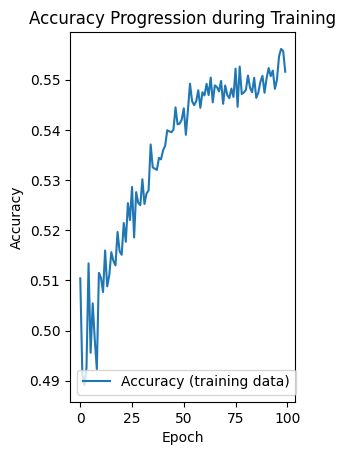

In [29]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.title('Accuracy Progression during Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [30]:
y_pred = model.predict(X_test_MLP.values.astype('float32'))
y_pred_rounded = (y_pred > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test_MLP.values.astype('float32'), y_pred_rounded))
print("Classification Report:\n", classification_report(y_test_MLP.values.astype('float32'), y_pred_rounded))

399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
Accuracy: 0.48979912115505336
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.49      0.60     10105
         1.0       0.20      0.50      0.29      2639

    accuracy                           0.49     12744
   macro avg       0.49      0.49      0.44     12744
weighted avg       0.67      0.49      0.54     12744



Los pesos hicieron que el modelo calificara más casos como adictos, lo que nos combiene pues evita se nos escapen casos de adictos.

In [31]:
weights, biases = model.layers[1].get_weights()

importance = np.sum(np.abs(weights), axis=1)

feature_importance = dict(zip(["Feature_" + str(i) for i in range(weights.shape[0])], importance))
print("Feature Importance:", feature_importance)

Feature Importance: {'Feature_0': 8.676453, 'Feature_1': 8.8365755, 'Feature_2': 7.6453876, 'Feature_3': 7.7334867, 'Feature_4': 9.276283, 'Feature_5': 8.495071, 'Feature_6': 10.071959, 'Feature_7': 10.073023, 'Feature_8': 7.645152, 'Feature_9': 9.679617}


Se puede interpretar que la Feature 3 y 9 son las mpas influyentes. Por lo que las analizaremos

In [32]:
X_train_MLP.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment
0,1,0,0,1,0,0,0,1,0,0
1,0,1,-1,1,1,1,1,1,1,0
2,0,0,0,0,0,1,1,1,0,0
3,1,0,1,1,0,1,0,0,0,1
4,1,1,0,-1,0,1,1,1,0,0


Estas corresponden a Financial Issues y Resistencia al tratamiento.

# Clustering

In [33]:
df_for_v = pd.concat([X_train_MLP, X_test_MLP])

In [34]:
min_max_scaler = preprocessing.MinMaxScaler()
datos_normalizados = min_max_scaler.fit_transform(df_for_v)
datos_normalizados

array([[1. , 0.5, 0.5, ..., 1. , 0.5, 0.5],
       [0.5, 1. , 0. , ..., 1. , 1. , 0.5],
       [0.5, 0.5, 0.5, ..., 1. , 0.5, 0.5],
       ...,
       [0.5, 0.5, 1. , ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 1. , 0.5, 0.5],
       [0.5, 1. , 0.5, ..., 0. , 0.5, 0.5]])

In [35]:
pca = PCA(n_components=2)
pca.fit(df_for_v)

PCA(n_components=2)

In [36]:
X_2 =pca.fit_transform(df_for_v )
X_2

array([[ 0.3032455 ,  0.16822287],
       [-0.66759408,  1.58882479],
       [ 0.26445011, -0.053494  ],
       ...,
       [ 0.26009764, -0.65016982],
       [ 0.57696167,  0.27354155],
       [ 1.2370175 ,  0.43119297]])

In [37]:
umap_2d = umap.UMAP(n_components=2, min_dist=0.6, n_neighbors=10, n_jobs=8)
projection = umap_2d.fit_transform(X_2)


c:\Users\franc\OneDrive - Universidad Católica de Chile\UC\7° Semestre\Mineria de datos\IIC2433\venv\Lib\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
c:\Users\franc\OneDrive - Universidad Católica de Chile\UC\7° Semestre\Mineria de datos\IIC2433\venv\Lib\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


In [38]:
df_c = pd.concat([y_train_MLP, y_test_MLP])

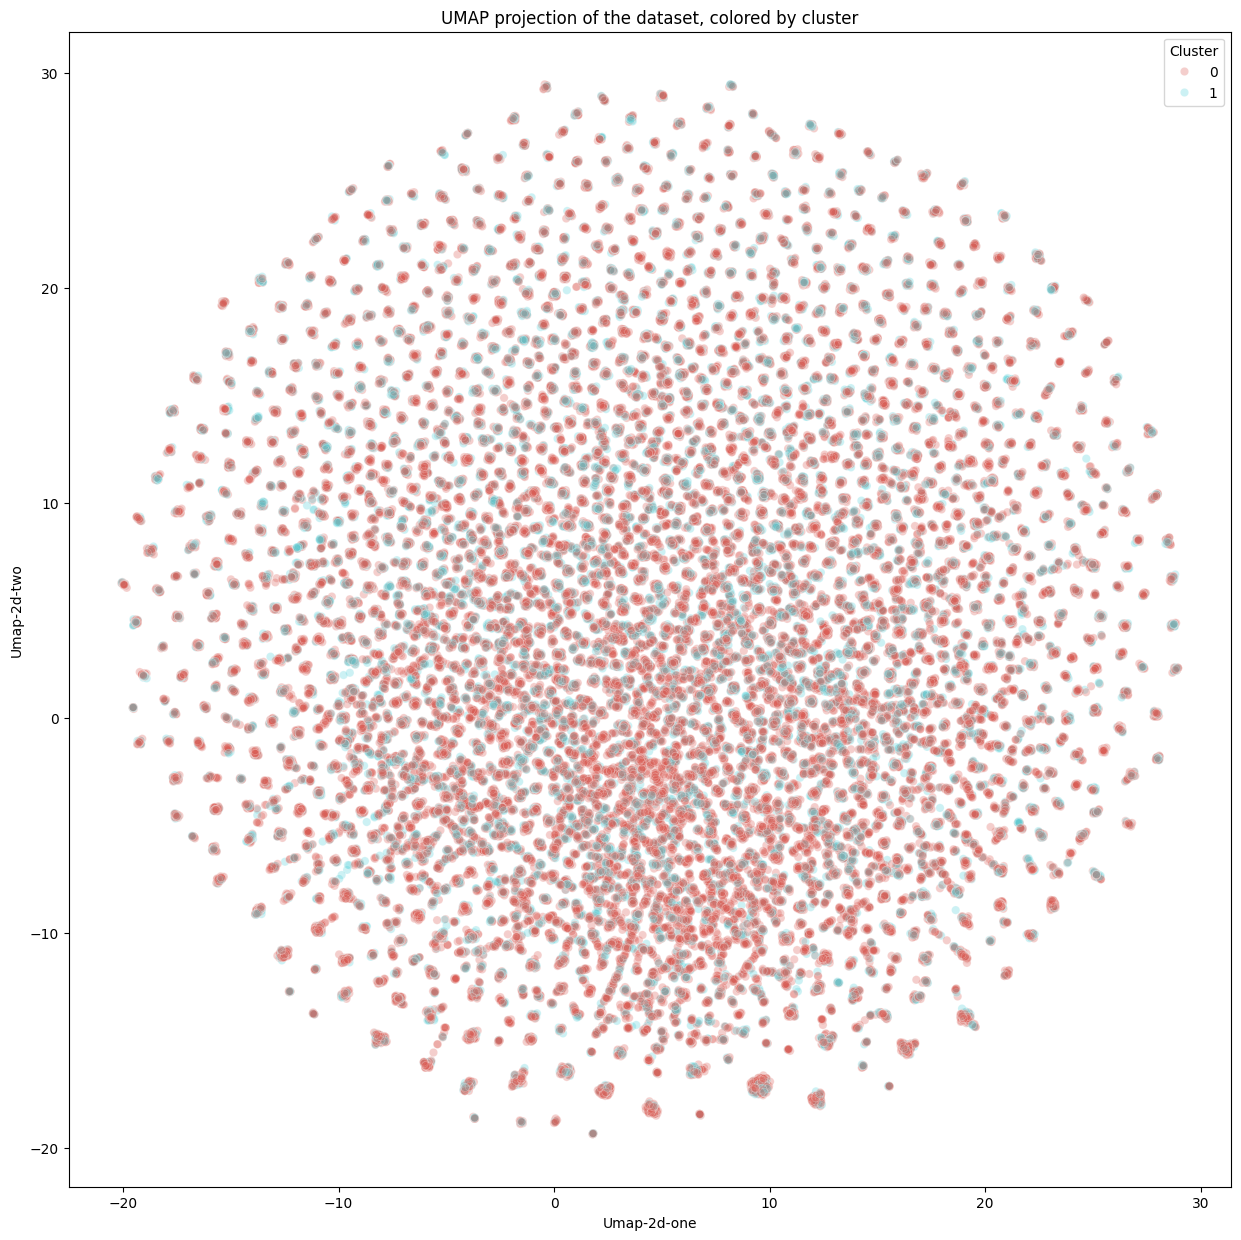

In [39]:
df_subset = pd.DataFrame()
df_subset['Umap-2d-one'] = projection[:, 0]
df_subset['Umap-2d-two'] = projection[:, 1]
df_subset['Cluster'] = df_c.values

plt.figure(figsize=(15, 15))  
sns.scatterplot(
    x="Umap-2d-one", y="Umap-2d-two",
    hue="Cluster",  
    palette=sns.color_palette("hls", 2),  
    data=df_subset,
    legend="full",
    alpha=0.3
)
plt.title('UMAP projection of the dataset, colored by cluster')
plt.show()
